# Workforce Scheduler

### Authors

Sara Carolina Gomez Delgado

Luis Eduardo Robles Jimenez

In [1]:
from data import * 
from genetic_algorithm import genetic_algorithm
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def graph(points, lbl = None):
    if lbl is None: plt.scatter(np.arange(len(points)), points)
    else:
        plt.scatter(np.arange(len(points)), points, label = lbl)
        plt.legend()

In [3]:
def printSchedule(solution):
    print("Nombre", "LUN", "MAR", "MIER", "JUE", "VIE", "SAB", "DOM", sep = "\t")
    for i, p in enumerate(solution):
        print(people[i][:6], end = '\t')
        for j, d in enumerate(p):
            print(codigos[d], end = '\t')
        print(areas[i][0], end = '\t')
        if len(areas[i]) > 1: print(areas[i][1], end = "")
        print()

In [4]:
popSize = 50

descanso = np.where(breaks == "Descansa")[0]
manana = np.where(breaks == "Mañana")[0]
tarde = np.where(breaks == "Tarde")[0]
comida = np.where(breaks == "Comida")[0]

In [5]:
pop = [[comida, descanso, manana, comida, comida, comida, descanso] if p in domingos else [descanso, manana if np.random.random() <= 0.5 else tarde, comida, comida, comida, comida, comida] for p in people]
initial_population = [np.copy(pop) for i in range(popSize)]
initial_population = np.array(initial_population).reshape((popSize, len(people), 7))
initial_population.shape

(50, 18, 7)

In [6]:
r = genetic_algorithm(rules, (breaks, areas, inventario, people, domingos), popSize, 100, pRep = 0.5, pMut = 0.5, dim = (len(people), 7, 0, len(breaks)), init = initial_population, debug = False)
r

{'solution': array([[0, 0, 2, 0, 0, 1, 0],
        [1, 0, 0, 0, 2, 0, 0],
        [0, 2, 0, 1, 0, 0, 0],
        [0, 0, 1, 2, 0, 0, 0],
        [0, 0, 0, 0, 1, 3, 0],
        [0, 0, 0, 1, 2, 0, 0],
        [0, 1, 3, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 2, 1],
        [0, 1, 0, 0, 2, 0, 1],
        [2, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 1, 2, 0, 0],
        [1, 0, 0, 0, 0, 3, 0],
        [0, 1, 0, 0, 0, 2, 0],
        [0, 0, 0, 0, 1, 3, 0],
        [0, 0, 0, 1, 2, 0, 1],
        [1, 0, 0, 2, 0, 0, 0],
        [0, 0, 0, 2, 1, 0, 1],
        [0, 0, 0, 3, 0, 1, 0]], dtype=int64),
 'fitness': 17,
 'callsToFunction': 5050,
 'bestTracker': [-21,
  -19,
  -19,
  -13,
  -13,
  -13,
  -9,
  -9,
  -9,
  -9,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  12,
  12,
  12,
  12,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,

In [7]:
a = rules(r['solution'], breaks, areas, inventario, people, domingos, True)
print("Fitness: {}".format(a[0]))
print("{} errors.".format(len(a[1])))
print(*a[1][:10], sep = '\n')

[[0 0 2 0 0 1 0]
 [1 0 0 0 2 0 0]
 [0 2 0 1 0 0 0]
 [0 0 1 2 0 0 0]
 [0 0 0 0 1 3 0]
 [0 0 0 1 2 0 0]
 [0 1 3 0 0 0 0]
 [1 0 0 0 0 2 1]
 [0 1 0 0 2 0 1]
 [2 0 1 0 0 0 0]
 [0 0 0 1 2 0 0]
 [1 0 0 0 0 3 0]
 [0 1 0 0 0 2 0]
 [0 0 0 0 1 3 0]
 [0 0 0 1 2 0 1]
 [1 0 0 2 0 0 0]
 [0 0 0 2 1 0 1]
 [0 0 0 3 0 1 0]]
Fitness: 17
0 errors.



In [8]:
printSchedule(r['solution'])

Nombre	LUN	MAR	MIER	JUE	VIE	SAB	DOM
Samant	C	C	M	C	C	D	C	Damas	Lenceria
Luz	D	C	C	C	M	C	C	Damas	Ninas
Laura	C	M	C	D	C	C	C	Damas	Moda joven
Maira	C	C	D	M	C	C	C	Damas	Dama madura
Gloria	C	C	C	C	D	T	C	Zapateria	Zapateria damas
Fernan	C	C	C	D	M	C	C	Zapateria	Zapato deportivo
Mariso	C	D	T	C	C	C	C	Caballeros	Bebes
Susy	D	C	C	C	C	M	D	Zapateria	Zapato caballero
Diana	C	D	C	C	M	C	D	Jugueteria	
Brayan	M	C	D	C	C	C	C	Perfumeria	
Nallel	C	C	C	D	M	C	C	Cajas ropa	
Marlet	D	C	C	C	C	T	C	Cajas ropa	
Lucia	C	D	C	C	C	M	C	Caballeros	
Fabian	C	C	C	C	D	T	C	Caballeros	
Albert	C	C	C	D	M	C	D	Zapateria	Zapato caballero
Elena	D	C	C	M	C	C	C	Paqueteria	
Nancy	C	C	C	M	D	C	D	Caballeros	Ninos
Andrea	C	C	C	T	C	D	C	Caballeros	Bebes


In [9]:
entreSemana = ['2', '4', '6', 'E2']
sabado = ['1', '2', '3', '4', '5']
domingo = ['11:30', '12', '12:30']

In [10]:
solution = r['solution']
solution = solution.astype(str)
for d in range(solution.shape[1]):
    area = dict() # Stores by area the day that is the most empty, so the greater it is, the more spread will people be
    for h in range(solution.shape[0]):
        if not areas[h][0] in area:
            area[areas[h][0]] = [0, 0, 0]
        if solution[h, d].astype(int) == comida:
            if d in range(5):
                solution[h, d] = entreSemana[area[areas[h][0]][0] % len(entreSemana)]
                area[areas[h][0]][0] += 1
            if d == 5:
                solution[h, d] = sabado[area[areas[h][0]][1] % len(sabado)]
                area[areas[h][0]][1] += 1
            if d == 6:
                solution[h, d] = domingo[area[areas[h][0]][2] % len(domingo)]
                area[areas[h][0]][2] += 1
        else: solution[h, d] = codigos[solution[h, d].astype(int)]

In [11]:
print("Nombre", "LUN", "MAR", "MIER", "JUE", "VIE", "SAB", "DOM", sep = "\t")
for i, p in enumerate(solution):
    print(people[i][:6], end = '\t')
    for d in p:
        print(d, end = '\t')
    print(areas[i][0], end = '\t')
    if len(areas[i]) > 1: print(areas[i][1], end = "")
    print()

Nombre	LUN	MAR	MIER	JUE	VIE	SAB	DOM
Samant	2	2	M	2	2	D	11:30	Damas	Lenceria
Luz	D	4	2	4	M	1	12	Damas	Ninas
Laura	4	M	4	D	4	2	12:30	Damas	Moda joven
Maira	6	6	D	M	6	3	11:30	Damas	Dama madura
Gloria	2	2	2	2	D	T	11:30	Zapateria	Zapateria damas
Fernan	4	4	4	D	M	1	12	Zapateria	Zapato deportivo
Mariso	2	D	T	2	2	1	11:30	Caballeros	Bebes
Susy	D	6	6	4	2	M	D	Zapateria	Zapato caballero
Diana	2	D	2	2	M	1	D	Jugueteria	
Brayan	M	2	D	2	2	1	11:30	Perfumeria	
Nallel	2	2	2	D	M	1	11:30	Cajas ropa	
Marlet	D	4	4	2	2	T	12	Cajas ropa	
Lucia	4	D	2	4	4	M	12	Caballeros	
Fabian	6	2	4	6	D	T	12:30	Caballeros	
Albert	6	E2	E2	D	M	2	D	Zapateria	Zapato caballero
Elena	D	2	2	M	2	1	11:30	Paqueteria	
Nancy	E2	4	6	M	D	2	D	Caballeros	Ninos
Andrea	2	6	E2	T	6	D	11:30	Caballeros	Bebes


(pR = 0.25, pM = 0.25)	->	15.1
(pR = 0.25, pM = 0.5)	->	13.7
(pR = 0.25, pM = 0.75)	->	9.4
(pR = 0.5, pM = 0.25)	->	16.5
(pR = 0.5, pM = 0.5)	->	13.3
(pR = 0.5, pM = 0.75)	->	12.1
(pR = 0.75, pM = 0.25)	->	15.6
(pR = 0.75, pM = 0.5)	->	10.2
(pR = 0.75, pM = 0.75)	->	8.5


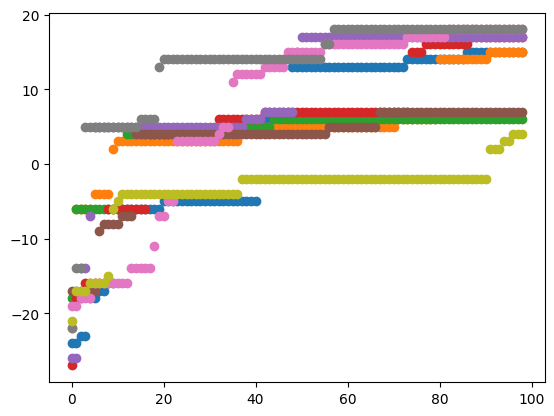

In [12]:
for pR in np.arange(0.25, 1, 0.25):
    for pM in np.arange(0.25, 1, 0.25):
        s, iter = 0, 10
        tracker, best = [], -1e10
        for i in range(iter):
            r = genetic_algorithm(rules, (breaks, areas, inventario, people, domingos), popSize, 100, pRep = pR, pMut = pM, dim = (len(people), 7, 0, len(breaks)), init = initial_population, debug = False)
            s += r['fitness']
            if not i or s > best:
                best = s
                tracker = r['bestTracker']
        graph(tracker)
        print("(pR = {}, pM = {})\t->\t{}".format(pR, pM, s/iter))